In [ ]:
#Connecting to Gdrive
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#changing the working directory
%cd /content/gdrive/My Drive/Colab Notebooks/

/content/gdrive/My Drive/Colab Notebooks


In [6]:
#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import os
import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Conv1D, GlobalMaxPool1D, LSTM, TimeDistributed, Flatten
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.sequence import pad_sequences
# CNN for the IMDB problem
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences

# PART-1

## 1.1. Import and analyse the data set.

Hint: - Use `imdb.load_data()` method
- Get train and test set
- Take 10000 most frequent words

In [8]:
#Loading the existing pre-data-module
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 4s 0us/step


In [9]:
#Target vs predictors
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

In [10]:
#Printing the shapes of train, test datasets
print(X_train.shape)
print(X_test.shape)
print(y_train)
print(y_test)

(25000,)
(25000,)
[1 0 0 ... 0 1 0]
[0 1 1 ... 0 0 0]


In [11]:
# Summarize number of Labels
print("Labels: ")
print(np.unique(y_train))

Labels: 
[0 1]


## 1.2. Perform relevant sequence adding on the data

No.of unique words in both train & test dataset

In [12]:
# Summarize number of words
print("Number of words: ")
print(len(np.unique(np.hstack(X))))

Number of words: 
9998


Its just under 10000 for 25k records.

Review length: 
Mean 234.76 words (172.911495)


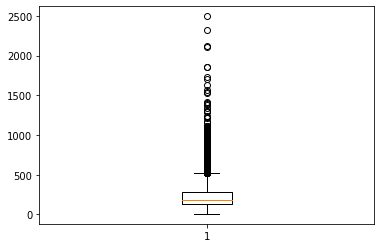

In [14]:
# Summarize review length
print("Review length: ")
result = [len(x) for x in X]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))
# plot review length
plt.boxplot(result)
plt.show()

We can see that the average review has just under 300 words with a standard deviation of just over 200 words.

In [15]:
#Lets look at the max length
X_train_max_len = max(len(x) for x in X)
print("Max length of sequence in X_train: {}".format(X_train_max_len))

Max length of sequence in X_train: 2494


2494 words are max in a review. Thats too far away from Mean which is ~300.

Lets plot the length of words in each reviews.

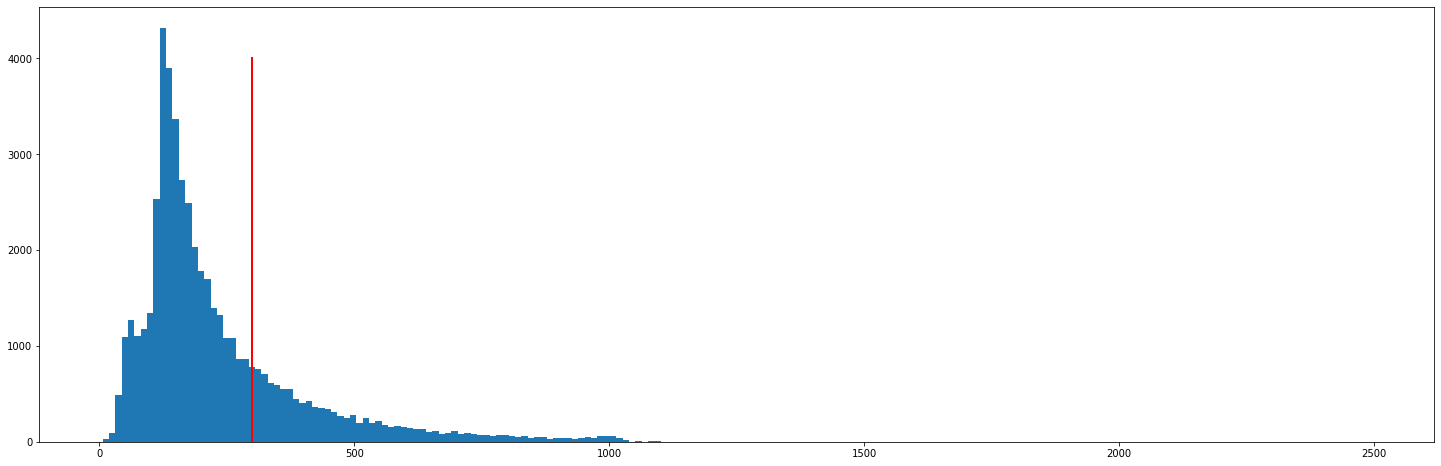

Average review length: 234.75892
Standard deviation: 173
No of reviews with length below 300: 38583


In [16]:
length = [len(i) for i in X]
plt.figure(figsize=(25,8))
plt.hist(length, bins= 200)
plt.plot([300, 300], [0, 4000], 'r', linewidth=2.0)
plt.show()
print("Average review length: {}".format(np.mean(length)))
print("Standard deviation: {}".format(round(np.std(length))))
print("No of reviews with length below 300: {}".format(sum(i < 301 for i in length)))

we have about 77% reviews with below 300 words.

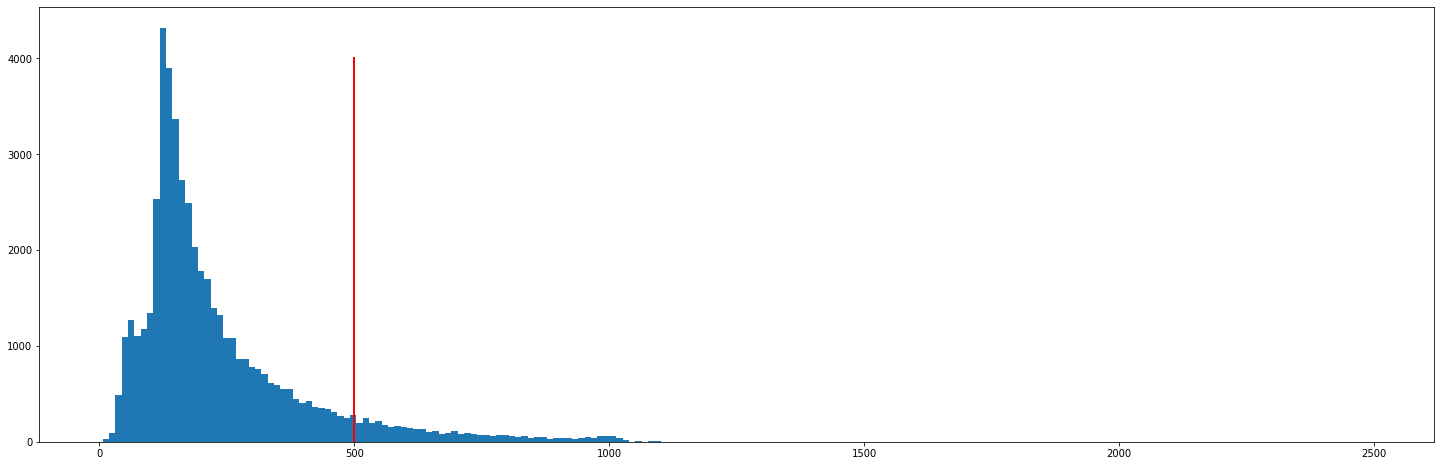

Average review length: 234.75892
Standard deviation: 173
No of reviews with length below 300: 45967


In [17]:
length = [len(i) for i in X]
plt.figure(figsize=(25,8))
plt.hist(length, bins= 200)
plt.plot([500, 500], [0, 4000], 'r', linewidth=2.0)
plt.show()
print("Average review length: {}".format(np.mean(length)))
print("Standard deviation: {}".format(round(np.std(length))))
print("No of reviews with length below 300: {}".format(sum(i < 501 for i in length)))

We have about 92% reviews with less than 500 words where as max 2494. 



So lets truncate the dataset to a length of 500 for each observation.

### Padding each sentence to be of same length

We choose to cap the maximum review length at 500 words, truncating reviews longer than that and padding reviews shorter than that with 0 values.

In [18]:
X_padded = pad_sequences(X, padding='post', maxlen=500)

In [19]:
#Lets loot at the max length
X_max_len = max(len(x) for x in X_padded)
print("Max length of sequence in X: {}".format(X_max_len))

Max length of sequence in X: 500


Review length: 
Mean 500.00 words (0.000000)


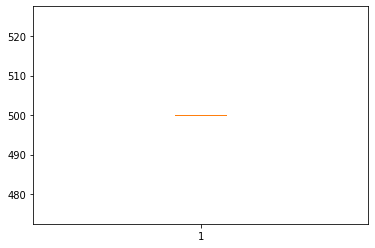

In [21]:
# Summarize review length
print("Review length: ")
result = [len(x) for x in X_padded]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))
# plot review length
plt.boxplot(result)
plt.show()

All are of same length

## 1.3. Perform following data analysis:

-  Print shape of features and labels
-  Print value of any one feature and it's label

Number of review, number of words in each review

In [22]:
print('Number of reviews: {}, Number of words in each review: {}'.format(X_padded.shape[0],X_padded.shape[1]))

Number of reviews: 50000, Number of words in each review: 500


In [23]:
# summarize size
# number of reviews
print("Number of reviews in x_train: {}".format(len(X_train)))
print("Number of reviews in x_test: {}".format(len(X_test)))

Number of reviews in x_train: 25000
Number of reviews in x_test: 25000


In [24]:
print('Number of labels: {}'.format(y.shape[0]))

Number of labels: 50000


In [25]:
y_train.shape

(25000,)

In [26]:
y_test.shape
print("Unique Labels: ")
print(np.unique(y_train))

Unique Labels: 
[0 1]


### Print value of any one feature and it's label
Feature value

In [27]:
print("Value of the 100th review:" ,X_train[0])

Value of the 100th review: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [28]:
print("Sentiment Label:", y_train[0])

Sentiment Label: 1


That is a postive review

In [29]:
X_padded[0]

array([   1,   14,   22,   16,   43,  530,  973, 1622, 1385,   65,  458,
       4468,   66, 3941,    4,  173,   36,  256,    5,   25,  100,   43,
        838,  112,   50,  670,    2,    9,   35,  480,  284,    5,  150,
          4,  172,  112,  167,    2,  336,  385,   39,    4,  172, 4536,
       1111,   17,  546,   38,   13,  447,    4,  192,   50,   16,    6,
        147, 2025,   19,   14,   22,    4, 1920, 4613,  469,    4,   22,
         71,   87,   12,   16,   43,  530,   38,   76,   15,   13, 1247,
          4,   22,   17,  515,   17,   12,   16,  626,   18,    2,    5,
         62,  386,   12,    8,  316,    8,  106,    5,    4, 2223, 5244,
         16,  480,   66, 3785,   33,    4,  130,   12,   16,   38,  619,
          5,   25,  124,   51,   36,  135,   48,   25, 1415,   33,    6,
         22,   12,  215,   28,   77,   52,    5,   14,  407,   16,   82,
          2,    8,    4,  107,  117, 5952,   15,  256,    4,    2,    7,
       3766,    5,  723,   36,   71,   43,  530,  4

In [30]:
y[0]

1

## 1.4. Decode the feature value to get original sentence

### Decoding the feature value to get original sentence
First, retrieve a dictionary that contains mapping of words to their index in the IMDB dataset

In [31]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

1654784/1641221 [==============================] - 0s 0us/step


In [32]:
print(" ".join([reverse_word_index.get(n-3, '#') for n in X_padded[0]]))

# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for # and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also # to the two little boy's that played the # of norman and paul they were just brilliant children are often left out of the # list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

Now use the dictionary to get the original words from the encodings, for a particular sentence

In [33]:
y[0]

1

As we can see that the review is good and the label also confirmed the same

In [34]:
#Train, Test split
train_X, test_X, train_y, test_y = train_test_split(X_padded, y, test_size=0.20, random_state=7)

## 1.5. Design, train, tune and test a sequential model.

In [35]:
#Defining a Model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=100, input_length=500))
model.add(LSTM(units=100, return_sequences=True, dropout=0.2))
model.add(TimeDistributed(Dense(100)))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [36]:
#Model compiling
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [37]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 100)          1000000   
_________________________________________________________________
lstm (LSTM)                  (None, 500, 100)          80400     
_________________________________________________________________
time_distributed (TimeDistri (None, 500, 100)          10100     
_________________________________________________________________
flatten (Flatten)            (None, 50000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 50001     
Total params: 1,140,501
Trainable params: 1,140,501
Non-trainable params: 0
_________________________________________________________________
None


In [38]:
history = model.fit(train_X, np.array(train_y), batch_size=300, epochs=15, validation_split=0.1, verbose=1)

Epoch 1/15
120/120 [==============================] - 276s 2s/step - loss: 0.4092 - accuracy: 0.7929 - val_loss: 0.2762 - val_accuracy: 0.8895
Epoch 2/15
120/120 [==============================] - 304s 3s/step - loss: 0.2300 - accuracy: 0.9086 - val_loss: 0.2882 - val_accuracy: 0.8798
Epoch 3/15
120/120 [==============================] - 313s 3s/step - loss: 0.1801 - accuracy: 0.9302 - val_loss: 0.2902 - val_accuracy: 0.8832
Epoch 4/15
120/120 [==============================] - 324s 3s/step - loss: 0.1446 - accuracy: 0.9436 - val_loss: 0.3070 - val_accuracy: 0.8830
Epoch 5/15
120/120 [==============================] - 313s 3s/step - loss: 0.0935 - accuracy: 0.9652 - val_loss: 0.3982 - val_accuracy: 0.8820
Epoch 6/15
120/120 [==============================] - 302s 3s/step - loss: 0.0580 - accuracy: 0.9800 - val_loss: 0.4717 - val_accuracy: 0.8808
Epoch 7/15
120/120 [==============================] - 306s 3s/step - loss: 0.0374 - accuracy: 0.9864 - val_loss: 0.5393 - val_accuracy: 0.8767

In [39]:
results = model.evaluate(test_X, test_y)

313/313 [==============================] - 28s 89ms/step - loss: 1.1860 - accuracy: 0.8676


In [40]:
predict_y = (model.predict(test_X) > 0.5).astype("int32").flatten()
confusion_matrix(test_y, predict_y)

array([[4504,  535],
       [ 789, 4172]], dtype=int64)

In [41]:
scores, accuracy = model.evaluate(test_X, test_y, verbose=0)
print("Score: {:.4f}".format(scores))
print("Accuracy: {:.4f}".format(accuracy))

Score: 1.1860
Accuracy: 0.8676


## 1.6. Use the designed model to print the prediction on any one sample.

In [42]:
#Predicting the one sample
print('Prediction: {} | Ground Truth: {}'.format(((model.predict(test_X[7].reshape(-1,500)) > 0.5).astype("int32").flatten()), test_y[7]))

Prediction: [1] | Ground Truth: 1


Lets try predicting the sentiment of few our own samples

In [43]:
#Random samples
sample1 = "i like it seems good to me"
sample2 = "it is not that bad"
sample3 = "waste of time do not watch"

In [44]:
for review in [sample1, sample2, sample3]:
    encoded_review = []
    review_split = review.split(" ")
    for word in review_split:
        encoded_review.append(word_index[word])
    review_padded = pad_sequences([encoded_review], maxlen=500)
    pred = model.predict(review_padded)
    if pred > 0.5:
        sentiment = 'positive'
    else:
        sentiment = 'negative'
    print("Review: {0}\n\tSentiment: {1}".format(review, sentiment))

Review: i like it seems good to me
	Sentiment: positive
Review: it is not that bad
	Sentiment: positive
Review: waste of time do not watch
	Sentiment: negative


### Let's try few other models

#### One-Dimensional Convolutional Neural Network Model

In [45]:
# create the model
model = Sequential()
model.add(Embedding(10000, 32, input_length=500))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
conv1d (Conv1D)              (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 250, 32)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 250)               2000250   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 251       
Total params: 2,323,605
Trainable params: 2,323,605
Non-trainable params: 0
____________________________________________

In [46]:
# Fit the model
model.fit(train_X, np.array(train_y), epochs=15, validation_split=0.1, verbose=1)


Epoch 1/15
1125/1125 [==============================] - 24s 20ms/step - loss: 0.3305 - accuracy: 0.8453 - val_loss: 0.2468 - val_accuracy: 0.9003
Epoch 2/15
1125/1125 [==============================] - 23s 21ms/step - loss: 0.1711 - accuracy: 0.9346 - val_loss: 0.2528 - val_accuracy: 0.8988
Epoch 3/15
1125/1125 [==============================] - 23s 21ms/step - loss: 0.0839 - accuracy: 0.9709 - val_loss: 0.3100 - val_accuracy: 0.8928
Epoch 4/15
1125/1125 [==============================] - 23s 21ms/step - loss: 0.0294 - accuracy: 0.9906 - val_loss: 0.4428 - val_accuracy: 0.8863
Epoch 5/15
1125/1125 [==============================] - 23s 21ms/step - loss: 0.0164 - accuracy: 0.9945 - val_loss: 0.5475 - val_accuracy: 0.8863
Epoch 6/15
1125/1125 [==============================] - 23s 21ms/step - loss: 0.0130 - accuracy: 0.9954 - val_loss: 0.6329 - val_accuracy: 0.8878
Epoch 7/15
1125/1125 [==============================] - 24s 21ms/step - loss: 0.0144 - accuracy: 0.9951 - val_loss: 0.7461 -

In [47]:
results = model.evaluate(test_X, test_y)

313/313 [==============================] - 2s 5ms/step - loss: 0.9950 - accuracy: 0.8752


In [48]:
# Final evaluation of the model
scores = model.evaluate(test_X, test_y, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 87.52%


In [49]:
predict_y = (model.predict(test_X) > 0.5).astype("int32").flatten()
confusion_matrix(test_y, predict_y)

array([[4634,  405],
       [ 843, 4118]], dtype=int64)

In [ ]:
#cm = pd.DataFrame(cm , index = ['Negative','Postive'] , columns = ['Negative','Postive'])
#sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , annot = True, fmt='' , xticklabels = ['Negative','Positive'] , yticklabels = ['Negative','Postive'])

# PART-2

In [7]:
import tensorflow as tf
import re
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, GRU, LSTM, Bidirectional
from keras.layers.embeddings import Embedding
from keras.initializers import Constant
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud, ImageColorGenerator
import plotly.express as px
from plotly import graph_objs as go
import plotly.figure_factory as ff
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
%matplotlib inline

import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Arjun\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Arjun\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

## 2.1. Read and explore the data

In [ ]:
#Loading the dataset from JSON file
data =  pd.read_json('./NLP2/Sarcasm_Headlines_Dataset.json', lines=True) 
data.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [51]:
print("Shape of data")
data.shape

Shape of data


(28619, 3)

We have almost 29k records & lets copy the dataset before we make any changes.

In [52]:
#Backing up
Part2_df = data.copy()
Part2_df.shape

(28619, 3)

## 2.2. Retain relevant columns

In [53]:
#Dropping off Article Link, as its is not needed
Part2_df = Part2_df.drop(['article_link'],axis = 1)
Part2_df.shape

(28619, 2)

In [54]:
#Exploring dataset
Part2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
dtypes: int64(1), object(1)
memory usage: 447.3+ KB


In [55]:
#Verifying the NULL count
Part2_df.isnull().sum()

is_sarcastic    0
headline        0
dtype: int64

No null values present in the dataset

0    14985
1    13634
Name: is_sarcastic, dtype: int64 



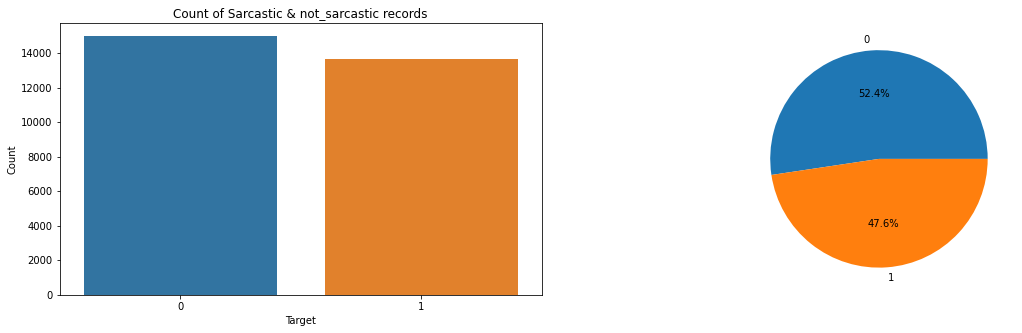

In [56]:
#Target variable
print(Part2_df.is_sarcastic.value_counts() ,"\n")

fig, ax = plt.subplots(1,2, figsize=(19, 5))
f1 = sns.countplot(Part2_df.is_sarcastic, ax = ax[0]);
f1.set_title("Count of Sarcastic & not_sarcastic records")
f1.set_ylabel("Count")
f1.set_xlabel("Target")

f2 = plt.pie(Part2_df["is_sarcastic"].value_counts().values,explode=[0,0],labels=Part2_df.is_sarcastic.value_counts().index, autopct='%1.1f%%')
fig.show()

Target column seems to be balanced.

## 2.3. Get length of each sentence

In [57]:
#Getting length
def length(phrase):
    return len(phrase.split())

Part2_df["length"] = Part2_df["headline"].apply(length)
Part2_df.head()

,is_sarcastic,headline,length
0,1,thirtysomething scientists unveil doomsday clo...,8
1,0,dem rep. totally nails why congress is falling...,13
2,0,eat your veggies: 9 deliciously different recipes,7
3,1,inclement weather prevents liar from getting t...,8
4,1,mother comes pretty close to using word 'strea...,9


#### Visualization of characters in text

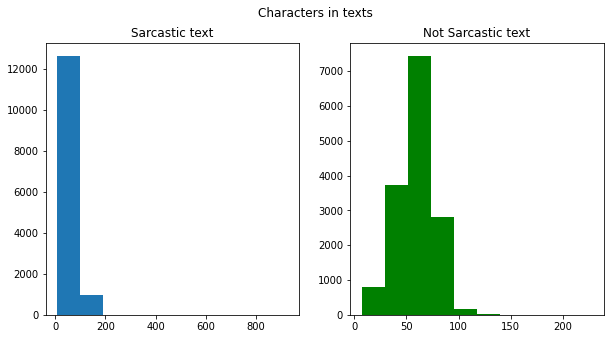

In [58]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
text_len=Part2_df[Part2_df['is_sarcastic']==1]['headline'].str.len()
ax1.hist(text_len)
ax1.set_title('Sarcastic text')
text_len=Part2_df[Part2_df['is_sarcastic']==0]['headline'].str.len()
ax2.hist(text_len, color='green')
ax2.set_title('Not Sarcastic text')
fig.suptitle('Characters in texts')
plt.show()

Sarcastic headlines seems to be shorter than non-sarcastic.

#### Visualization of words in texts

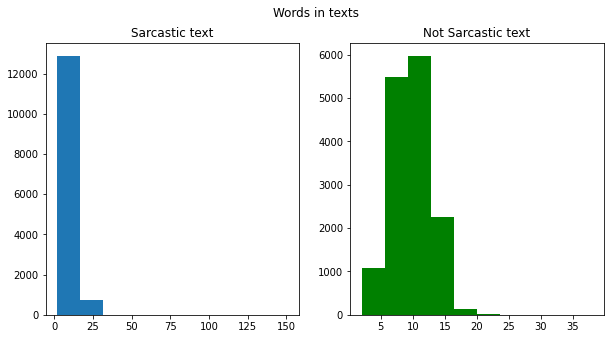

In [59]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=Part2_df[Part2_df['is_sarcastic']==1]['headline'].str.split().map(lambda x: len(x))
ax1.hist(text_len)
ax1.set_title('Sarcastic text')
text_len=Part2_df[Part2_df['is_sarcastic']==0]['headline'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='green')
ax2.set_title('Not Sarcastic text')
fig.suptitle('Words in texts')
plt.show()

Most sarcastic headlines are short & very few are lengthy unlike non-sarcastic headlines.

#### Visualization of average word length in each text

Text(0.5, 0.98, 'Average word length in each text')

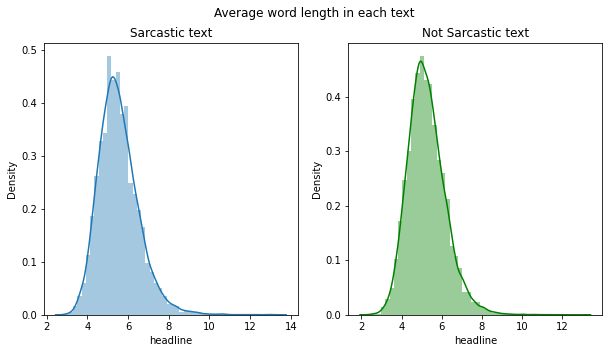

In [60]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=Part2_df[Part2_df['is_sarcastic']==1]['headline'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1)
ax1.set_title('Sarcastic text')
word=Part2_df[Part2_df['is_sarcastic']==0]['headline'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Not Sarcastic text')
fig.suptitle('Average word length in each text')

Avg word length seems to be 5 for both categories. 

## 2.4. Define parameters

#### Clean the Data

In [61]:
#Cleaning the data
def clean_text(text):
    text = text.lower()
    
    pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    text = pattern.sub('', text)
    text = " ".join(filter(lambda x:x[0]!='@', text.split()))
    emoji = re.compile("["
                           u"\U0001F600-\U0001FFFF"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    
    text = emoji.sub(r'', text)
    text = text.lower()
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"that's", "that is", text)        
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"where's", "where is", text) 
    text = re.sub(r"\'ll", " will", text)  
    text = re.sub(r"\'ve", " have", text)  
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"did't", "did not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"couldn't", "could not", text)
    text = re.sub(r"have't", "have not", text)
    text = re.sub(r"[,.\"\'!@#$%^&*(){}?/;`~:<>+=-]", "", text)
    return text

In [65]:
def CleanTokenize(df):
    head_lines = list()
    lines = df["headline"].values.tolist()

    for line in lines:
        line = clean_text(line)
        # tokenize the text
        tokens = word_tokenize(line)
        # remove puntuations
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in tokens]
        # remove non alphabetic characters
        words = [word for word in stripped if word.isalpha()]
        stop_words = set(stopwords.words("english"))
        # remove stop words
        words = [w for w in words if not w in stop_words]
        head_lines.append(words)
    return head_lines

head_lines = CleanTokenize(Part2_df)
head_lines[0:10]

[['thirtysomething',
  'scientists',
  'unveil',
  'doomsday',
  'clock',
  'hair',
  'loss'],
 ['dem',
  'rep',
  'totally',
  'nails',
  'congress',
  'falling',
  'short',
  'gender',
  'racial',
  'equality'],
 ['eat', 'veggies', 'deliciously', 'different', 'recipes'],
 ['inclement', 'weather', 'prevents', 'liar', 'getting', 'work'],
 ['mother',
  'comes',
  'pretty',
  'close',
  'using',
  'word',
  'streaming',
  'correctly'],
 ['white', 'inheritance'],
 ['ways', 'file', 'taxes', 'less', 'stress'],
 ['richard',
  'bransons',
  'globalwarming',
  'donation',
  'nearly',
  'much',
  'cost',
  'failed',
  'balloon',
  'trips'],
 ['shadow',
  'government',
  'getting',
  'large',
  'meet',
  'marriott',
  'conference',
  'room',
  'b'],
 ['lots', 'parents', 'know', 'scenario']]

## 2.5. Get indices for words

### Visualzing the most occuring words

(-0.5, 999.5, 499.5, -0.5)

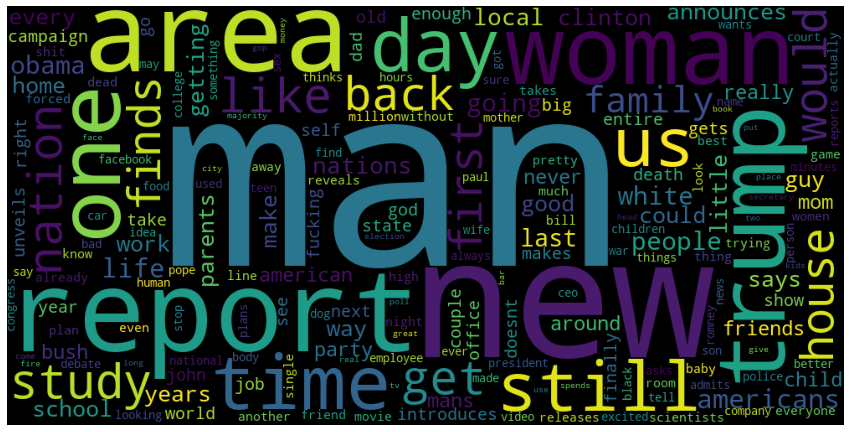

In [66]:
#Most occuring words in SARCASTIC HEADLINES
pos_data = Part2_df.loc[Part2_df['is_sarcastic'] == 1]
pos_head_lines = CleanTokenize(pos_data)
pos_lines = [j for sub in pos_head_lines for j in sub] 
word_could_dict=Counter(pos_lines)

wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")

(-0.5, 999.5, 499.5, -0.5)

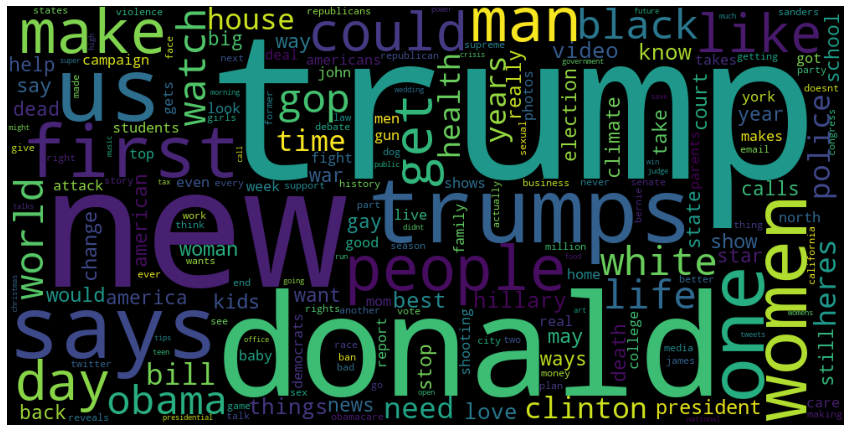

In [67]:
#Most occuring words in NON SARCASTIC HEADLINES
pos_data = Part2_df.loc[Part2_df['is_sarcastic'] == 0]
pos_head_lines = CleanTokenize(pos_data)
pos_lines = [j for sub in pos_head_lines for j in sub] 
word_could_dict=Counter(pos_lines)

wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")

#### Finding most common words across all headlines. - Top 15

In [68]:
all_words=[]
for i in range(len(head_lines)):
    a=head_lines[i]
    for i in a:
        all_words.append(i)
all_words=pd.Series(np.array(all_words))

common_words=all_words.value_counts()[:100].rename_axis('Common Words').reset_index(name='count')

In [79]:
common_words[:15]

,Common Words,count
0,new,1677
1,trump,1389
2,man,1373
3,report,604
4,us,601
5,one,555
6,woman,505
7,area,494
8,says,485
9,day,473


## 2.6 & 2.7. Create features and labels & Get vocabulary size

In [70]:
validation_split = 0.2
max_length = 25


tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(head_lines)
sequences = tokenizer_obj.texts_to_sequences(head_lines)

word_index = tokenizer_obj.word_index
print("unique tokens - ",len(word_index))
vocab_size = len(tokenizer_obj.word_index) + 1
print('vocab size -', vocab_size)

lines_pad = pad_sequences(sequences, maxlen=max_length, padding='post')
sentiment =  Part2_df['is_sarcastic'].values

indices = np.arange(lines_pad.shape[0])
np.random.shuffle(indices)
lines_pad = lines_pad[indices]
sentiment = sentiment[indices]

num_validation_samples = int(validation_split * lines_pad.shape[0])

X_train_pad = lines_pad[:-num_validation_samples]
y_train = sentiment[:-num_validation_samples]
X_test_pad = lines_pad[-num_validation_samples:]
y_test = sentiment[-num_validation_samples:]

unique tokens -  28657
vocab size - 28658


In [71]:
print('Shape of X_train_pad:', X_train_pad.shape)
print('Shape of y_train:', y_train.shape)

print('Shape of X_test_pad:', X_test_pad.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train_pad: (22896, 25)
Shape of y_train: (22896,)
Shape of X_test_pad: (5723, 25)
Shape of y_test: (5723,)


## 2.8. Create a weight matrix using GloVe embeddings

#### Load GloVe model

In [73]:
embeddings_index = {}
embedding_dim = 50
GLOVE_DIR = ""
f = open(os.path.join(GLOVE_DIR, './NLP2/DataSet - glove.6B.50d.txt'), encoding = "utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


### Build the embedding layer

In [74]:
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
c = 0
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        c+=1
        embedding_matrix[i] = embedding_vector
print(c)

24993


In [75]:
embedding_layer = Embedding(len(word_index) + 1,
                            embedding_dim,
                            weights=[embedding_matrix],
                            input_length=max_length,
                            trainable=False)

# 2.9. Define and compile a Bidirectional LSTM model.

In [76]:
#Basic LSTM model
model = Sequential()
model.add(embedding_layer)
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.25))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

print('Summary of the built model...')
print(model.summary())

Summary of the built model...
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 25, 50)            1432900   
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 1,462,405
Trainable params: 29,505
Non-trainable params: 1,432,900
_________________________________________________________________
None


In [77]:
history = model.fit(X_train_pad, y_train, batch_size=32, epochs=25, validation_data=(X_test_pad, y_test), verbose=2)

Epoch 1/25
716/716 - 15s - loss: 0.5892 - acc: 0.6887 - val_loss: 0.5478 - val_acc: 0.7278
Epoch 2/25
716/716 - 12s - loss: 0.5241 - acc: 0.7406 - val_loss: 0.4924 - val_acc: 0.7652
Epoch 3/25
716/716 - 12s - loss: 0.4934 - acc: 0.7642 - val_loss: 0.4827 - val_acc: 0.7681
Epoch 4/25
716/716 - 12s - loss: 0.4752 - acc: 0.7742 - val_loss: 0.4809 - val_acc: 0.7728
Epoch 5/25
716/716 - 13s - loss: 0.4616 - acc: 0.7811 - val_loss: 0.4579 - val_acc: 0.7823
Epoch 6/25
716/716 - 13s - loss: 0.4481 - acc: 0.7892 - val_loss: 0.4511 - val_acc: 0.7860
Epoch 7/25
716/716 - 12s - loss: 0.4406 - acc: 0.7928 - val_loss: 0.4570 - val_acc: 0.7793
Epoch 8/25
716/716 - 13s - loss: 0.4295 - acc: 0.8011 - val_loss: 0.4468 - val_acc: 0.7861
Epoch 9/25
716/716 - 13s - loss: 0.4165 - acc: 0.8087 - val_loss: 0.4411 - val_acc: 0.7942
Epoch 10/25
716/716 - 13s - loss: 0.4125 - acc: 0.8101 - val_loss: 0.4508 - val_acc: 0.7947
Epoch 11/25
716/716 - 13s - loss: 0.4058 - acc: 0.8146 - val_loss: 0.4307 - val_acc: 0.79

## 2.10. Fit the model and check the validation accuracy

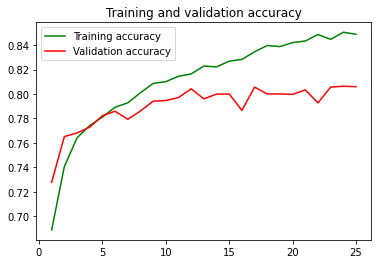

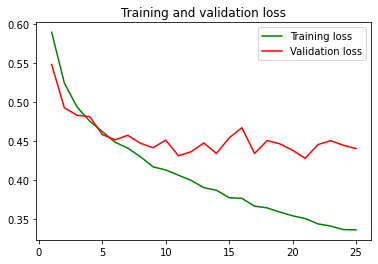

In [80]:
# Plot results
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Val loss is slightly going up after 10-12 epochs.

## Predictions

In [81]:
def predict_sarcasm(s):
    x_final = pd.DataFrame({"headline":[s]})
    test_lines = CleanTokenize(x_final)
    test_sequences = tokenizer_obj.texts_to_sequences(test_lines)
    test_review_pad = pad_sequences(test_sequences, maxlen=max_length, padding='post')
    pred = model.predict(test_review_pad)
    pred*=100
    if pred[0][0]>=50: return "It's a sarcasm!" 
    else: return "It's not a sarcasm."

In [82]:
predict_sarcasm("I was depressed. He asked me to be happy. I am not depressed anymore.")

"It's a sarcasm!"

In [83]:
predict_sarcasm("You just broke my car window. Great job.")

"It's a sarcasm!"

In [84]:
predict_sarcasm("You just saved my dog's life. Thanks a million.")

"It's not a sarcasm."

In [85]:
predict_sarcasm("I want a million dollars!")

"It's not a sarcasm."

#### Incorrect predicions

In [89]:
predict_sarcasm("His name is Bob. He is a nice person.")

"It's a sarcasm!"

In [90]:
predict_sarcasm("Sarcasm is very easy to detect.")

"It's not a sarcasm."

## Lets try few different models & compare the results.

### CONVOLUTIONAL NEURAL NETWORK (CNN)

In [ ]:
#Building the CNN Model
model_conv = tf.keras.Sequential([
    tf.keras.layers.Embedding(len(word_index) + 1,embedding_dim,weights=[embedding_matrix],input_length=max_length,trainable=False),
    tf.keras.layers.Conv1D(16,3,activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [ ]:
model_conv.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 25, 50)            1432900   
                                                                 
 conv1d_2 (Conv1D)           (None, 23, 16)            2416      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 11, 16)           0         
 1D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 176)               0         
                                                                 
 dense_6 (Dense)             (None, 6)                 1062      
                                                                 
 dense_7 (Dense)             (None, 1)                 7         
                                                      

In [ ]:
model_conv.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history= model_conv.fit(X_train_pad, y_train, batch_size=32, epochs=25, validation_data=(X_test_pad, y_test), verbose=2)

Epoch 1/25
716/716 - 3s - loss: 0.5924 - accuracy: 0.6831 - val_loss: 0.5572 - val_accuracy: 0.7155 - 3s/epoch - 5ms/step
Epoch 2/25
716/716 - 2s - loss: 0.5207 - accuracy: 0.7434 - val_loss: 0.5375 - val_accuracy: 0.7353 - 2s/epoch - 3ms/step
Epoch 3/25
716/716 - 3s - loss: 0.4949 - accuracy: 0.7600 - val_loss: 0.5222 - val_accuracy: 0.7433 - 3s/epoch - 3ms/step
Epoch 4/25
716/716 - 3s - loss: 0.4779 - accuracy: 0.7705 - val_loss: 0.5200 - val_accuracy: 0.7463 - 3s/epoch - 4ms/step
Epoch 5/25
716/716 - 3s - loss: 0.4638 - accuracy: 0.7779 - val_loss: 0.5162 - val_accuracy: 0.7533 - 3s/epoch - 4ms/step
Epoch 6/25
716/716 - 2s - loss: 0.4510 - accuracy: 0.7877 - val_loss: 0.5134 - val_accuracy: 0.7554 - 2s/epoch - 3ms/step
Epoch 7/25
716/716 - 2s - loss: 0.4425 - accuracy: 0.7905 - val_loss: 0.5155 - val_accuracy: 0.7503 - 2s/epoch - 3ms/step
Epoch 8/25
716/716 - 2s - loss: 0.4349 - accuracy: 0.7963 - val_loss: 0.5075 - val_accuracy: 0.7545 - 2s/epoch - 3ms/step
Epoch 9/25
716/716 - 2s 

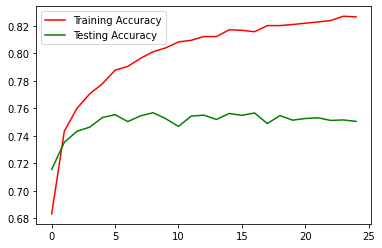

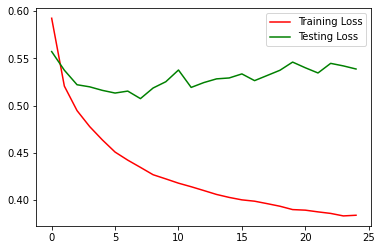

In [ ]:
#Evaluating Accuracy and Loss of the model
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) #No. of epochs

#Plot training and validation accuracy per epoch
plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Testing Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Testing Loss')
plt.legend()
plt.show()

In [ ]:
pred = model_conv.predict(X_test_pad)
pred[pred >= 0.5] = 1
pred[pred < 0.5] = 0
cm = confusion_matrix(y_test,pred)
cm

array([[2214,  783],
       [ 645, 2081]])

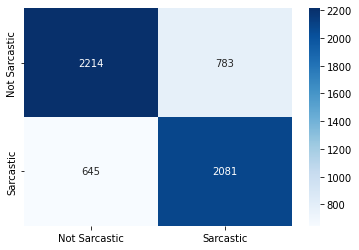

In [ ]:
cm = pd.DataFrame(cm , index = ['Not Sarcastic','Sarcastic'] , columns = ['Not Sarcastic','Sarcastic'])
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , annot = True, fmt='' , xticklabels = ['Not Sarcastic','Sarcastic'] , yticklabels = ['Not Sarcastic','Sarcastic'])

Didnt perfrome well in finding non-saracastic class

### Bidirectional GATED RECURRENT UNIT (GRU)

In [ ]:
#Building the GRU Model
model_gru = tf.keras.Sequential([
    tf.keras.layers.Embedding(len(word_index) + 1,embedding_dim,weights=[embedding_matrix],input_length=max_length,trainable=False),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(16)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model_gru.summary() 

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 25, 50)            1432900   
                                                                 
 bidirectional (Bidirectiona  (None, 32)               6528      
 l)                                                              
                                                                 
 dense_8 (Dense)             (None, 6)                 198       
                                                                 
 dense_9 (Dense)             (None, 1)                 7         
                                                                 
Total params: 1,439,633
Trainable params: 6,733
Non-trainable params: 1,432,900
_________________________________________________________________


In [ ]:
model_gru.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history1=model_gru.fit(X_train_pad, y_train, batch_size=32, epochs=25, validation_data=(X_test_pad, y_test), verbose=2)

Epoch 1/25
716/716 - 16s - loss: 0.5842 - accuracy: 0.6832 - val_loss: 0.5351 - val_accuracy: 0.7341 - 16s/epoch - 23ms/step
Epoch 2/25
716/716 - 11s - loss: 0.5018 - accuracy: 0.7543 - val_loss: 0.5006 - val_accuracy: 0.7578 - 11s/epoch - 16ms/step
Epoch 3/25
716/716 - 12s - loss: 0.4707 - accuracy: 0.7723 - val_loss: 0.4848 - val_accuracy: 0.7692 - 12s/epoch - 17ms/step
Epoch 4/25
716/716 - 12s - loss: 0.4472 - accuracy: 0.7844 - val_loss: 0.4654 - val_accuracy: 0.7795 - 12s/epoch - 17ms/step
Epoch 5/25
716/716 - 12s - loss: 0.4265 - accuracy: 0.7993 - val_loss: 0.4643 - val_accuracy: 0.7832 - 12s/epoch - 16ms/step
Epoch 6/25
716/716 - 11s - loss: 0.4090 - accuracy: 0.8087 - val_loss: 0.4563 - val_accuracy: 0.7853 - 11s/epoch - 16ms/step
Epoch 7/25
716/716 - 11s - loss: 0.3949 - accuracy: 0.8187 - val_loss: 0.4591 - val_accuracy: 0.7867 - 11s/epoch - 16ms/step
Epoch 8/25
716/716 - 11s - loss: 0.3836 - accuracy: 0.8229 - val_loss: 0.4623 - val_accuracy: 0.7818 - 11s/epoch - 16ms/step


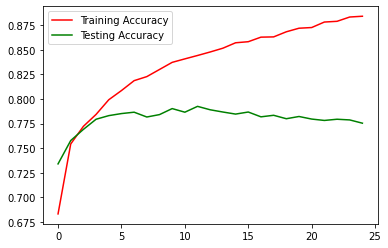

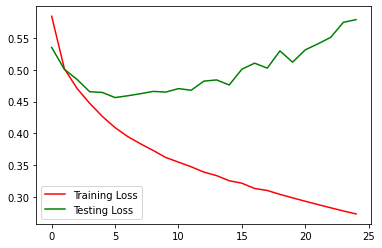

In [ ]:
#Evaluating Accuracy and Loss of the model
acc=history1.history['accuracy']
val_acc=history1.history['val_accuracy']
loss=history1.history['loss']
val_loss=history1.history['val_loss']

epochs=range(len(acc)) #No. of epochs

#Plot training and validation accuracy per epoch
plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Testing Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Testing Loss')
plt.legend()
plt.show()

In [ ]:
pred = model_gru.predict(X_test_pad)
pred[pred >= 0.5] = 1
pred[pred < 0.5] = 0
cm = confusion_matrix(y_test,pred)
cm

array([[2337,  660],
       [ 625, 2101]])

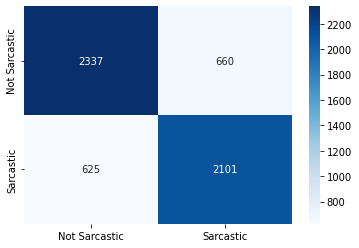

In [ ]:
cm = pd.DataFrame(cm , index = ['Not Sarcastic','Sarcastic'] , columns = ['Not Sarcastic','Sarcastic'])
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , annot = True, fmt='' , xticklabels = ['Not Sarcastic','Sarcastic'] , yticklabels = ['Not Sarcastic','Sarcastic'])

Slightly better than CNN model.

## Bidirectional LONG SHORT TERM MEMORY (LSTM)

In [ ]:
#Building the LSTM Model
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(len(word_index) + 1,embedding_dim,weights=[embedding_matrix],input_length=max_length,trainable=False),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model_lstm.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 25, 50)            1432900   
                                                                 
 bidirectional_1 (Bidirectio  (None, 32)               8576      
 nal)                                                            
                                                                 
 dense_10 (Dense)            (None, 6)                 198       
                                                                 
 dense_11 (Dense)            (None, 1)                 7         
                                                                 
Total params: 1,441,681
Trainable params: 8,781
Non-trainable params: 1,432,900
_________________________________________________________________


In [ ]:
model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history2=model_lstm.fit(X_train_pad, y_train, batch_size=32, epochs=25, validation_data=(X_test_pad, y_test), verbose=2)

Epoch 1/25
716/716 - 15s - loss: 0.5704 - accuracy: 0.7006 - val_loss: 0.5201 - val_accuracy: 0.7470 - 15s/epoch - 21ms/step
Epoch 2/25
716/716 - 10s - loss: 0.4862 - accuracy: 0.7687 - val_loss: 0.4933 - val_accuracy: 0.7669 - 10s/epoch - 14ms/step
Epoch 3/25
716/716 - 10s - loss: 0.4493 - accuracy: 0.7891 - val_loss: 0.4723 - val_accuracy: 0.7784 - 10s/epoch - 14ms/step
Epoch 4/25
716/716 - 11s - loss: 0.4246 - accuracy: 0.8047 - val_loss: 0.4743 - val_accuracy: 0.7776 - 11s/epoch - 15ms/step
Epoch 5/25
716/716 - 10s - loss: 0.4061 - accuracy: 0.8141 - val_loss: 0.4647 - val_accuracy: 0.7802 - 10s/epoch - 14ms/step
Epoch 6/25
716/716 - 10s - loss: 0.3878 - accuracy: 0.8256 - val_loss: 0.4721 - val_accuracy: 0.7833 - 10s/epoch - 14ms/step
Epoch 7/25
716/716 - 10s - loss: 0.3743 - accuracy: 0.8315 - val_loss: 0.4655 - val_accuracy: 0.7863 - 10s/epoch - 14ms/step
Epoch 8/25
716/716 - 10s - loss: 0.3636 - accuracy: 0.8380 - val_loss: 0.4697 - val_accuracy: 0.7840 - 10s/epoch - 15ms/step


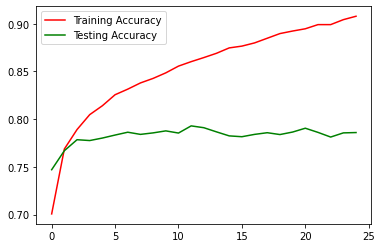

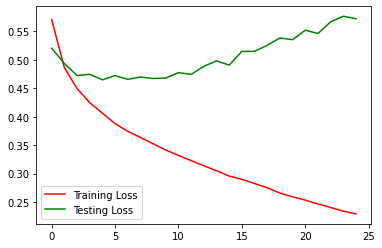

In [ ]:
#Evaluating Accuracy and Loss of the model
acc=history2.history['accuracy']
val_acc=history2.history['val_accuracy']
loss=history2.history['loss']
val_loss=history2.history['val_loss']

epochs=range(len(acc)) #No. of epochs

#Plot training and validation accuracy per epoch
plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Testing Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Testing Loss')
plt.legend()
plt.show()

In [ ]:
pred = model_lstm.predict(X_test_pad)
pred[:5]

array([[0.19098786],
       [0.99917185],
       [0.741205  ],
       [0.05317274],
       [0.9959548 ]], dtype=float32)

In [ ]:
pred[pred >= 0.5] = 1
pred[pred < 0.5] = 0
pred[:5]

array([[0.],
       [1.],
       [1.],
       [0.],
       [1.]], dtype=float32)

In [ ]:
cm = confusion_matrix(y_test,pred)
cm

array([[2441,  556],
       [ 669, 2057]])

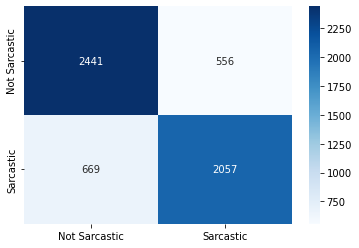

In [ ]:
cm = pd.DataFrame(cm , index = ['Not Sarcastic','Sarcastic'] , columns = ['Not Sarcastic','Sarcastic'])
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , annot = True, fmt='' , xticklabels = ['Not Sarcastic','Sarcastic'] , yticklabels = ['Not Sarcastic','Sarcastic'])

Better than CNN, GRU models.

In [98]:
################### End of Notebook ########################